In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Define the seed
SEED = 26  # You can use any random seed value here

# Load the data
features = pd.read_excel('高温合金数据集合2.xlsx')
label1 = np.array(features['Creep life'])
features = features.drop(['UTS', 'TYS', 'EL'], axis=1)
label1 = np.log(label1)  # Take the logarithm
features = pd.get_dummies(features)
feature_list = list(features.columns)
features = np.array(features)
features = MinMaxScaler().fit_transform(features)

# Define the MLP model
model_mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=SEED)  # You can adjust parameters as needed

# Define the number of folds
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=SEED)

# Initialize variables to store performance metrics
rmse_tr_list = []
rmse_te_list = []
r2_tr_list = []
r2_te_list = []

# Define a function for MAPE
def mape_function(predicted, actual):
    diff = np.abs(actual - predicted)
    pct_diff = diff / np.abs(actual)
    mape = np.mean(pct_diff) * 100
    return mape

mape_tr_list = []
mape_te_list = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(features):
    train_features, test_features = features[train_index], features[test_index]
    train_labels, test_labels = label1[train_index], label1[test_index]

    # Fit the MLP model
    model_mlp.fit(train_features, train_labels)

    # Predictions
    train_predicted_creeplife = model_mlp.predict(train_features)
    test_predicted_creeplife = model_mlp.predict(test_features)

    # Calculate performance metrics
    rmse_tr = mean_squared_error(train_labels, train_predicted_creeplife, squared=False)
    rmse_te = mean_squared_error(test_labels, test_predicted_creeplife, squared=False)
    r2_tr = r2_score(train_labels, train_predicted_creeplife)
    r2_te = r2_score(test_labels, test_predicted_creeplife)

    mape_tr = mape_function(train_predicted_creeplife, train_labels)
    mape_te = mape_function(test_predicted_creeplife, test_labels)

    # Append the metrics to the lists
    rmse_tr_list.append(rmse_tr)
    rmse_te_list.append(rmse_te)
    r2_tr_list.append(r2_tr)
    r2_te_list.append(r2_te)
    mape_tr_list.append(mape_tr)
    mape_te_list.append(mape_te)

# Calculate the mean and standard deviation of the metrics
mean_rmse_tr = np.mean(rmse_tr_list)
mean_rmse_te = np.mean(rmse_te_list)
mean_r2_tr = np.mean(r2_tr_list)
mean_r2_te = np.mean(r2_te_list)
mean_mape_tr = np.mean(mape_tr_list)
mean_mape_te = np.mean(mape_te_list)

# Print the results
print("Mean RMSE (Train): {:.4f}".format(mean_rmse_tr))
print("Mean RMSE (Test): {:.4f}".format(mean_rmse_te))
print("Mean R^2 (Train): {:.4f}".format(mean_r2_tr))
print("Mean R^2 (Test): {:.4f}".format(mean_r2_te))
print("Mean MAPE (Train): {:.4f}".format(mean_mape_tr))
print("Mean MAPE (Test): {:.4f}".format(mean_mape_te))

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

Mean RMSE (Train): 0.6372
Mean RMSE (Test): 0.6708
Mean R^2 (Train): 0.6815
Mean R^2 (Test): 0.6060
Mean MAPE (Train): 13.1212
Mean MAPE (Test): 14.1258


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


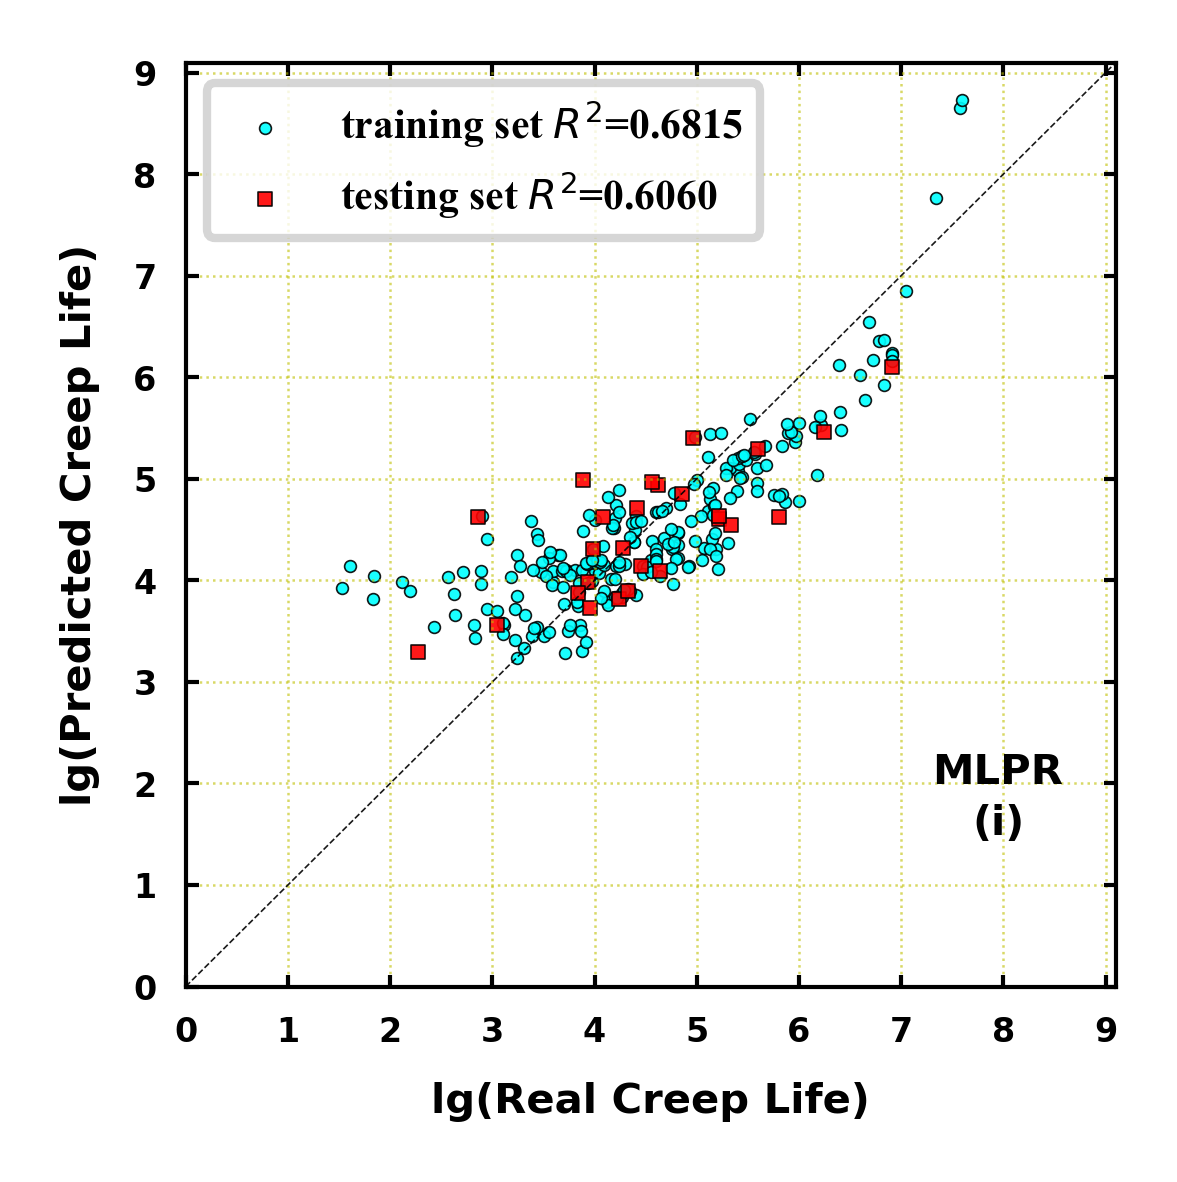

In [3]:
import matplotlib.pyplot as plt
mean_r2_tr = np.mean(r2_tr_list)
mean_r2_te = np.mean(r2_te_list)
# Define a function for MAPE (assuming you have this function defined)
# Set up the plot with a light blue background
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(0, 15, 1))
plt.xticks(new_ticks, fontsize=4,fontweight='bold')
plt.yticks(new_ticks, fontsize=4,fontweight='bold')
plt.plot([0, 9.1], [0, 9.1], 'k--', linewidth='0.2', alpha=0.9)
# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels, train_predicted_creeplife, alpha=0.9, s=2, linewidths=0.2, c='#00ffFF',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.4f' % mean_r2_tr, marker='o')
plt.scatter(test_labels, test_predicted_creeplife, alpha=0.9, s=3, linewidths=0.2, c='#FF0000',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.4f' % mean_r2_te, marker='s')

plt.ylim(0,9.1)
plt.xlim(0,9.1)
# 添加图例
plt.legend(prop={'family': 'Times New Roman', 'size': 5, 'weight': 'bold'}, ncol=1)
# 显示性能指标
# Display the plot
plt.xlabel('lg(Real Creep Life)', size=5, weight='bold')
plt.ylabel('lg(Predicted Creep Life)', size=5, weight='bold')
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.text(7.3, 2.0, 'MLPR', fontsize=5, weight='bold')
plt.text(7.7, 1.5, '(i)', fontsize=5, weight='bold')
plt.show()